In [1]:
import pandas as pd
import spacy

In [2]:
orig = pd.read_csv("chat_messages_cleaned - chat_messages_cleaned.csv")
intent = pd.read_csv("sample_team_chats - sample_team_chats.csv")

In [3]:
orig

,Unnamed: 0,participant__session__code,participant__session_id,participant__id_in_session,participant__code,channel,sender_role,body,timestamp,recipient__code,recipient_role,catalog,parameter_db
0,0,umtzl2qt,1,13,u76uc0tf,1-engine_design-3-1-3,crankshaft,Hi piston! My crankshaft depends on your bore ...,1554813515,r8fheelh,piston,0,0
1,1,umtzl2qt,1,11,r8fheelh,1-engine_design-3-1-3,piston,thank you!,1554813548,u76uc0tf,crankshaft,0,0
2,2,umtzl2qt,1,10,cbb51ylv,1-engine_design-2-1-5,pistonpin,How low can you go on the piston bore diameter?,1554813562,2wcqr3wm,piston,0,0
3,3,umtzl2qt,1,7,4ttkk1u5,1-engine_design-2-2-3,flywheel,"all my fos values are in the hundreds, i suspe...",1554813564,ntprw190,crankshaft,0,0
4,4,umtzl2qt,1,13,u76uc0tf,1-engine_design-3-2-3,crankshaft,Hi flywheel! My crankshaft depends on your fly...,1554813575,jyel22ui,flywheel,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7685,7685,8hwn1gy2,6,18,y3du15vf,6-engine_design-4-3-5,crankshaft,ok no one anything,1555014041,673ih9n3,pistonpin,0,0
7686,7686,8hwn1gy2,6,13,trvxaem2,6-engine_design-3-2-3,crankshaft,increase it to 50,1555014046,oya27cf1,flywheel,0,0
7687,7687,8hwn1gy2,6,13,trvxaem2,6-engine_design-3-2-3,crankshaft,what about thickness of flywheel?,1555014072,oya27cf1,flywheel,0,0
7688,7688,8hwn1gy2,6,12,oya27cf1,6-engine_design-3-2-3,flywheel,"its at 12, lowest",1555014096,trvxaem2,crankshaft,0,0


In [4]:
orig['timestamp'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1554813515
1       1554813548
2       1554813562
3       1554813564
4       1554813575
           ...    
7685    1555014041
7686    1555014046
7687    1555014072
7688    1555014096
7689    1555014116
Name: timestamp, Length: 7690, dtype: int64>

In [5]:
intent

,Unnamed: 0,participant__session__code,participant__session_id,participant__id_in_session,participant__code,channel,sender_role,body,timestamp,recipient__code,recipient_role,catalog,parameter_db,Intention
0,3417,03858kxd,1,4,gvdgbam9,1-engine_design-1-3-4,conrod,hey whats the crank length?,1554989809,v9fe9kul,crankshaft,0,0,Asking parameter value
1,3421,03858kxd,1,3,v9fe9kul,1-engine_design-1-3-4,crankshaft,try 40?,1554989856,gvdgbam9,conrod,0,0,Suggesting parameter value
2,3423,03858kxd,1,4,gvdgbam9,1-engine_design-1-3-4,conrod,aight bet,1554989865,v9fe9kul,crankshaft,0,0,Acknowledgement
3,3425,03858kxd,1,3,v9fe9kul,1-engine_design-1-3-4,crankshaft,sorry 225 first,1554989876,gvdgbam9,conrod,0,0,Suggesting parameter value
4,3428,03858kxd,1,4,gvdgbam9,1-engine_design-1-3-4,conrod,my connecting rod length = 1/(crank length),1554989938,v9fe9kul,crankshaft,0,0,Understanding dependency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,2401,bgi0y4g3,3,3,9ee75zci,3-engine_design-1-3-5,crankshaft,so i dont want to change,1554826111,ymdphnht,pistonpin,1,1,NaN
808,2429,bgi0y4g3,3,5,ymdphnht,3-engine_design-1-3-5,pistonpin,so youre at the value that is closest to 2 fos/,1554826163,9ee75zci,crankshaft,1,1,NaN
809,2432,bgi0y4g3,3,5,ymdphnht,3-engine_design-1-3-5,pistonpin,2.06 right,1554826174,9ee75zci,crankshaft,1,1,NaN
810,2436,bgi0y4g3,3,4,bqo4h10a,3-engine_design-1-4-5,conrod,I don't think any of them will be high enough ...,1554826181,ymdphnht,pistonpin,1,1,NaN


In [6]:
intent['timestamp'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1554989809
1      1554989856
2      1554989865
3      1554989876
4      1554989938
          ...    
807    1554826111
808    1554826163
809    1554826174
810    1554826181
811    1554826197
Name: timestamp, Length: 812, dtype: int64>

In [7]:
intent['Intention'].notnull()

0       True
1       True
2       True
3       True
4       True
       ...  
807    False
808    False
809    False
810    False
811    False
Name: Intention, Length: 812, dtype: bool

In [8]:
intent['Intention'].notnull().value_counts()

False    425
True     387
Name: Intention, dtype: int64

In [9]:
intent.value_counts()

Unnamed: 0  participant__session__code  participant__session_id  participant__id_in_session  participant__code  channel                sender_role  body                                                                   timestamp   recipient__code  recipient_role  catalog  parameter_db  Intention                                  
3417        03858kxd                    1                        4                           gvdgbam9           1-engine_design-1-3-4  conrod       hey whats the crank length?                                            1554989809  v9fe9kul         crankshaft      0        0             Asking parameter value                         1
4445        1x32i6ma                    3                        3                           z3dco7z1           3-engine_design-1-3-5  crankshaft   Yeah, FOS hasn't been an issue for me, it's just mass is way too high  1554998554  w9er5n6d         pistonpin       0        1             Indicating need for lesser mass               

In [10]:
pre = pd.read_excel("Lemma_data.xlsx")

In [11]:
pre

,id,body
0,1,"['hi', 'piston', 'my', 'crankshaft', 'depends'..."
1,2,"['thank', 'you']"
2,3,"['how', 'low', 'can', 'you', 'go', 'on', 'the'..."
3,4,"['all', 'my', 'factor', 'of', 'safety', 'value..."
4,5,"['hi', 'flywheel', 'my', 'crankshaft', 'depend..."
...,...,...
7685,7686,"['ok', 'no', 'one', 'anything']"
7686,7687,"['increase', 'it', 'to', '50']"
7687,7688,"['what', 'about', 'thickness', 'of', 'flywheel..."
7688,7689,"['its', 'at', '12', 'lowest']"


In [12]:
pre = pre.drop(['id'],axis = 1)

In [13]:
pre

,body
0,"['hi', 'piston', 'my', 'crankshaft', 'depends'..."
1,"['thank', 'you']"
2,"['how', 'low', 'can', 'you', 'go', 'on', 'the'..."
3,"['all', 'my', 'factor', 'of', 'safety', 'value..."
4,"['hi', 'flywheel', 'my', 'crankshaft', 'depend..."
...,...
7685,"['ok', 'no', 'one', 'anything']"
7686,"['increase', 'it', 'to', '50']"
7687,"['what', 'about', 'thickness', 'of', 'flywheel..."
7688,"['its', 'at', '12', 'lowest']"


In [14]:
!pip install wordcloud

In [15]:
from wordcloud import WordCloud
long_string = ','.join(list(pre['body'].values))

In [16]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [17]:
wordcloud.generate(long_string)


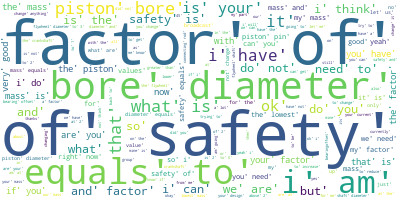

In [18]:
wordcloud.to_image()

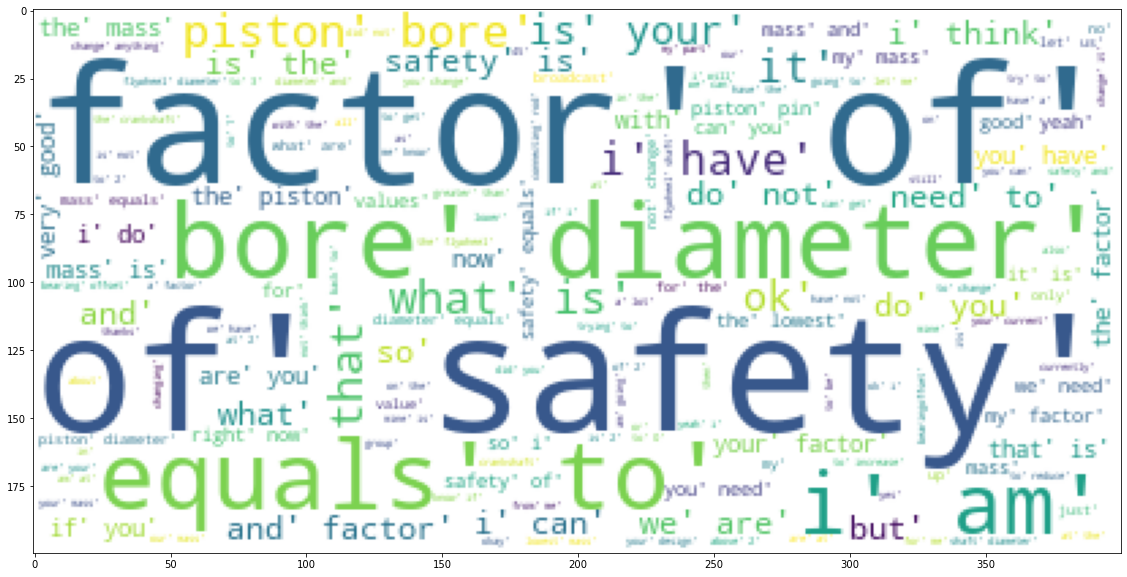

In [19]:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)


In [20]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = pre.body.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josephthomasthachil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['hi', 'piston', 'crankshaft', 'depends', 'bore', 'diameter', 'yet', 'know', 'probably', 'help', 'know']


In [21]:
data_words

[['hi',
  'piston',
  'crankshaft',
  'depends',
  'bore',
  'diameter',
  'yet',
  'know',
  'probably',
  'help',
  'know'],
 ['thank'],
 ['low', 'go', 'piston', 'bore', 'diameter'],
 ['factor',
  'safety',
  'values',
  'hundreds',
  'suspect',
  'depends',
  'lot',
  'bearingoffset'],
 ['hi',
  'flywheel',
  'crankshaft',
  'depends',
  'flywheel',
  'shaft',
  'diameter',
  'piston',
  'bore',
  'diameter',
  'thickness',
  'flywheel',
  'yet',
  'know',
  'probably',
  'help',
  'know'],
 ['min'],
 ['value', 'works', 'best', 'simulation'],
 ['value', 'bore', 'diameter'],
 ['let', 'play', 'around', 'numbers'],
 ['flywheel',
  'also',
  'depends',
  'crankshaft',
  'bearing',
  'offset',
  'bearingoffset'],
 ['broadcasted', 'recent', 'simulation', 'definitely', 'final', 'one'],
 ['sounds', 'good'],
 ['yes', 'broadcast'],
 ['sounds', 'good', 'tried', 'middle', 'values', 'broadcast'],
 ['thank', 'information'],
 ['hey',
  'conrod',
  'curious',
  'thought',
  'good',
  'piston',
  'd

In [22]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1)]


In [23]:
from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.053*"mass" + 0.040*"good" + 0.035*"ok" + 0.018*"values" + 0.017*"safety" '
  '+ 0.017*"factor" + 0.016*"need" + 0.014*"try" + 0.013*"okay" + '
  '0.013*"still"'),
 (1,
  '0.082*"safety" + 0.081*"factor" + 0.056*"diameter" + 0.055*"mass" + '
  '0.043*"piston" + 0.029*"equals" + 0.026*"bore" + 0.017*"flywheel" + '
  '0.016*"need" + 0.012*"think"'),
 (2,
  '0.033*"change" + 0.018*"mass" + 0.017*"back" + 0.016*"variables" + '
  '0.015*"factor" + 0.015*"safety" + 0.013*"length" + 0.012*"right" + '
  '0.012*"try" + 0.011*"ok"'),
 (3,
  '0.050*"factor" + 0.048*"safety" + 0.022*"good" + 0.021*"mass" + '
  '0.017*"weight" + 0.017*"let" + 0.015*"excellent" + 0.015*"yeah" + '
  '0.015*"us" + 0.014*"crankshaft"')]


In [24]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.110375  0.012130       1        1  42.685341
3     -0.006667 -0.064769       2        1  21.335621
0      0.074328 -0.042431       3        1  18.820255
2      0.042715  0.095070       4        1  17.158783, topic_info=          Term        Freq       Total Category  logprob  loglift
63      equals  390.000000  390.000000  Default  30.0000  30.0000
40        good  497.000000  497.000000  Default  29.0000  29.0000
169         ok  338.000000  338.000000  Default  28.0000  28.0000
283     change  375.000000  375.000000  Default  27.0000  27.0000
3     diameter  857.000000  857.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
3     diameter   56.769048  857.248338   Topic4  -4.5272  -0.9521
7       piston   51.111367  700.497475   Topic4  -4.6322  -0.8551
20    flywheel   38.220857  301.361413   Topic4  -4.9228  -0.3023
22   thickness   34.910573  194.880538   Topic4  -5.0134   0.0431
151      think   35.493001  274.043697   Topic4  -4.9969  -0.2813

[329 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
579       3  0.644753      abrupt
1887      4  0.748235  accomidate
1651      1  0.944213     achieve
416       1  0.060983    actually
416       2  0.182950    actually
...     ...       ...         ...
9         3  0.167983         yet
9         4  0.067193         yet
1098      1  0.902477      yields
119       1  0.877046         yup
119       3  0.125292         yup

[621 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

In [ ]:
#!conda install -c memex pyldavis

In [ ]:
#!python -m pip install -U pyLDAvis

    -- GAN from labels/topics and then new messages
    -- input to generator?

In [22]:
dtf = pd.read_csv("DesignIntent2.csv")

In [23]:
dtf

,body,intent_2
0,Hi piston! My crankshaft depends on your bore ...,NAN
1,thank you!,NAN
2,How low can you go on the piston bore diameter?,Exploration of design parameter values
3,"all my fos values are in the hundreds, i suspe...",Effects of design parameters on objectives
4,Hi flywheel! My crankshaft depends on your fly...,Dependencies between design parameters
...,...,...
495,I just lowered it to 25.23. That is low for th...,Selected design parameter values for objective(s)
496,Can you cut any more mass out and get closer t...,Tradeoff between objectives
497,sweet,NAN
498,"Yeah, that's not on me.",NAN


In [24]:
#hi = hi.drop(['id'],axis = 1)

In [25]:
dtf.columns = ['text','y']

In [26]:
dtf

,text,y
0,Hi piston! My crankshaft depends on your bore ...,NAN
1,thank you!,NAN
2,How low can you go on the piston bore diameter?,Exploration of design parameter values
3,"all my fos values are in the hundreds, i suspe...",Effects of design parameters on objectives
4,Hi flywheel! My crankshaft depends on your fly...,Dependencies between design parameters
...,...,...
495,I just lowered it to 25.23. That is low for th...,Selected design parameter values for objective(s)
496,Can you cut any more mass out and get closer t...,Tradeoff between objectives
497,sweet,NAN
498,"Yeah, that's not on me.",NAN


In [27]:
dtf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    500 non-null    object
 1   y       500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


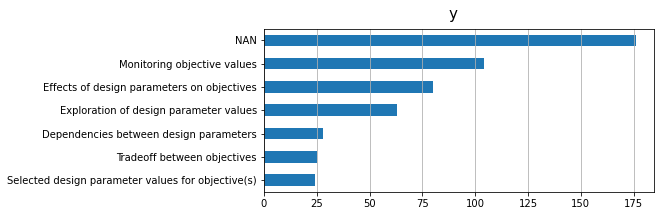

In [28]:
plot_distributions(dtf, x="y", top=None, figsize=(7,3))


In [30]:
dtf['y'].value_counts()

NAN                                                  176
Monitoring objective values                          104
Effects of design parameters on objectives            80
Exploration of design parameter values                63
Dependencies between design parameters                28
Tradeoff between objectives                           25
Selected design parameter values for objective(s)     24
Name: y, dtype: int64

In [31]:
import spacy
from spacy import displacy
#import ner_displacy
ner = spacy.load("en_core_web_lg")
lst_tag_type = ["ORG","PERSON","NORP","GPE","LOC","FAC","EVENT","PRODUCT","WORK_OF_ART","LANGUAGE","DATE","TIME","PERCENT","MONEY","QUANTITY","ORDINAL","CARDINAL"]
ner_displacy(dtf["text"].iloc[0], ner, lst_tag_type, title="NER example")

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.


In [ ]:
#!pip install -U spacy

In [ ]:
#!python -m spacy download en_core_web_lg

In [7]:
#!pip install ner_displacy
from nlp_util import *

In [ ]:
#!pip install nlp_util

In [32]:
# example of replacing text and tags extraction
utils_ner_text(dtf["text"].iloc[0], ner, lst_tag_type, grams_join="_")

("Hi piston! My crankshaft depends on your bore diameter. I don't yet know how, but it will probably help that you know.",
 [])

In [ ]:
#!pip install rouge

In [33]:
# this takes a while
dtf = add_ner_spacy(dtf, "text", ner, lst_tag_type, grams_join="_", create_features=True)
dtf.head()

--- tagging ---
--- counting tags ---
--- creating features ---


,text,y,text_tagged,tags,tags_ORG,tags_PRODUCT,tags_DATE,tags_PERSON,tags_TIME,tags_QUANTITY,tags_CARDINAL
0,Hi piston! My crankshaft depends on your bore ...,NAN,Hi piston! My crankshaft depends on your bore ...,[],0,0,0,0,0,0,0
1,thank you!,NAN,thank you!,[],0,0,0,0,0,0,0
2,How low can you go on the piston bore diameter?,Exploration of design parameter values,How low can you go on the piston bore diameter?,[],0,0,0,0,0,0,0
3,"all my fos values are in the hundreds, i suspe...",Effects of design parameters on objectives,"all my fos values are in the hundreds, i suspe...","[{('hundreds', 'CARDINAL'): 1}]",0,0,0,0,0,0,1
4,Hi flywheel! My crankshaft depends on your fly...,Dependencies between design parameters,Hi flywheel! My crankshaft depends on your fly...,[],0,0,0,0,0,0,0


In [34]:
# check
i = 0
print(dtf["text"].iloc[i], " --> ")
print(dtf["text_tagged"].iloc[i])
print("tags:")
dtf["tags"].iloc[i]

Hi piston! My crankshaft depends on your bore diameter. I don't yet know how, but it will probably help that you know.  --> 
Hi piston! My crankshaft depends on your bore diameter. I don't yet know how, but it will probably help that you know.
tags:


[]

# NAN:


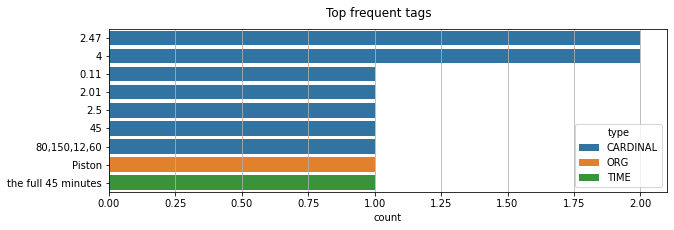

# Exploration of design parameter values:


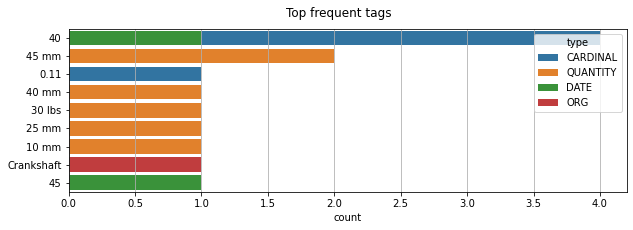

# Effects of design parameters on objectives:


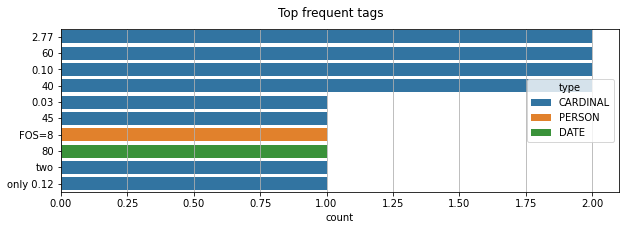

# Dependencies between design parameters:


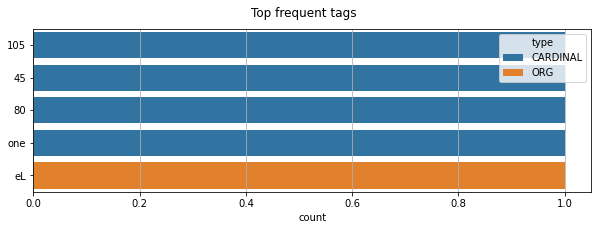

# Selected design parameter values for objective(s):


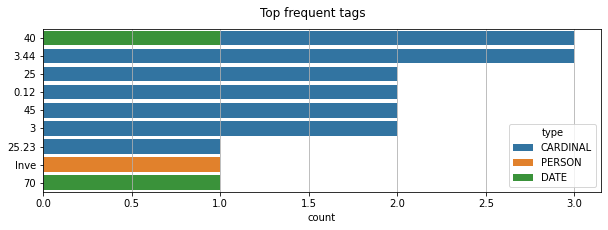

# Monitoring objective values:


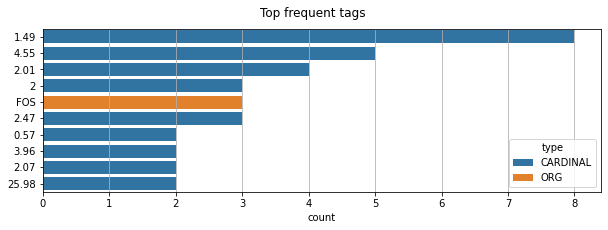

# Tradeoff between objectives:


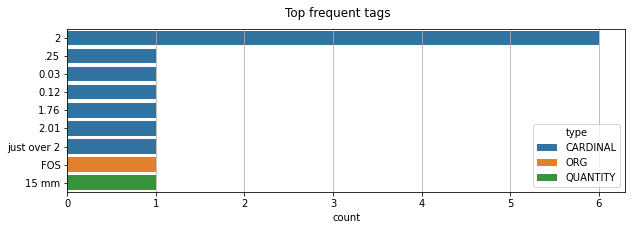

In [35]:
for y in dtf["y"].unique():
    print("# {}:".format(y))
    common_tags = tags_freq(tags=dtf[dtf["y"]==y]["tags"], top=10, figsize=(10,3))

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

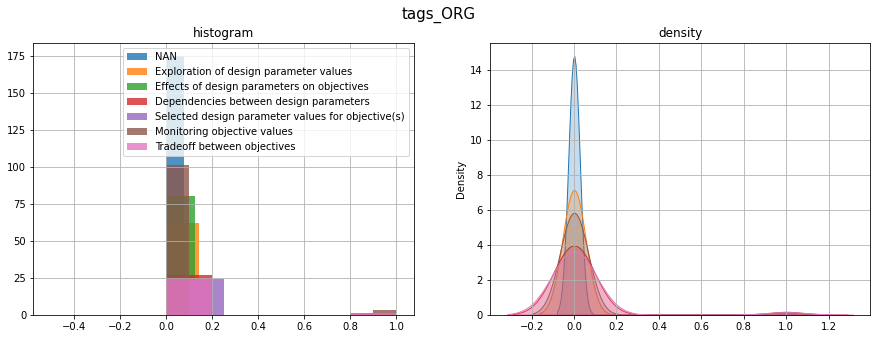

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has

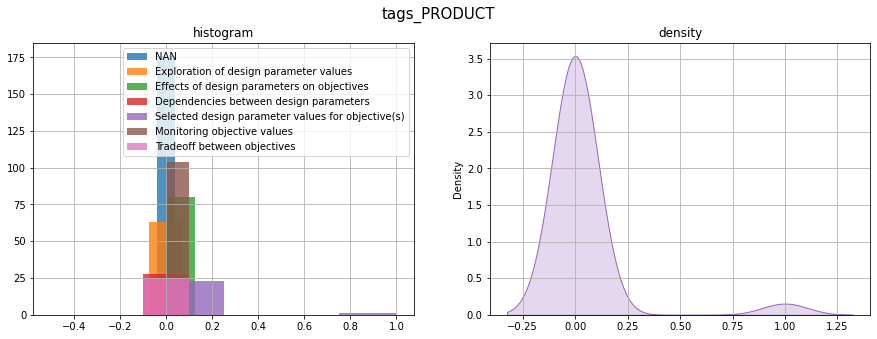

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` 

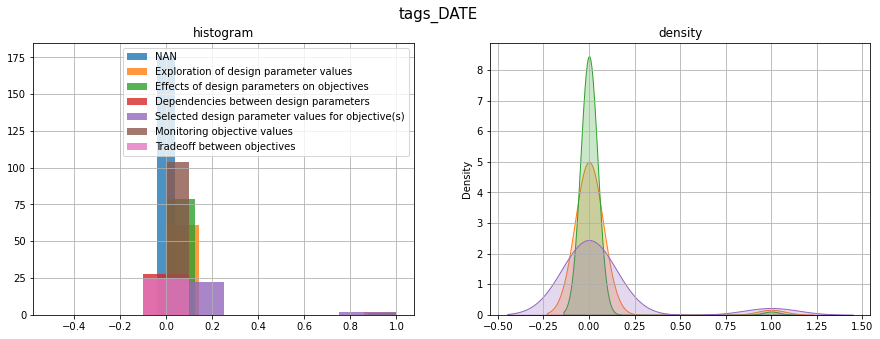

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has

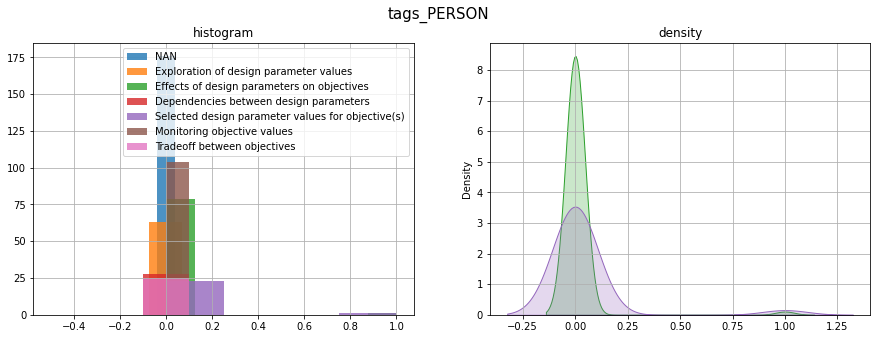

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` 

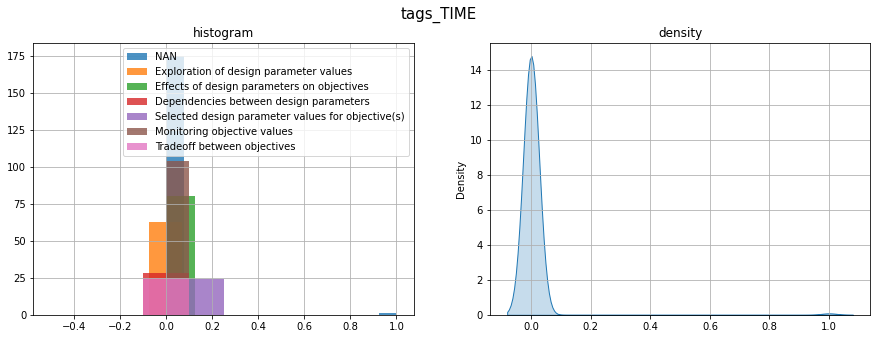

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
Dataset has 0 variance; skipping density estimate.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` 

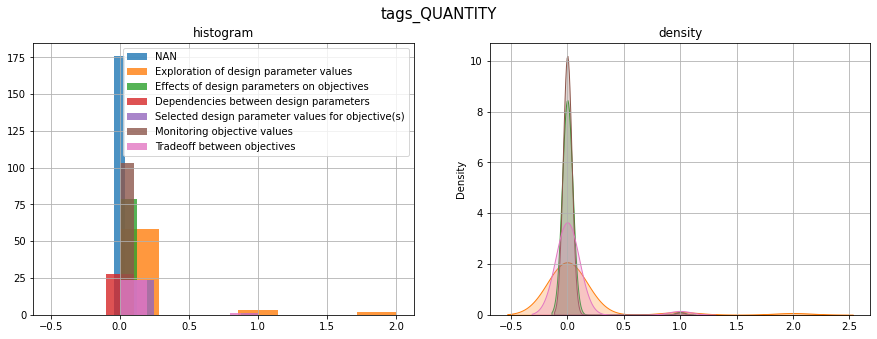

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

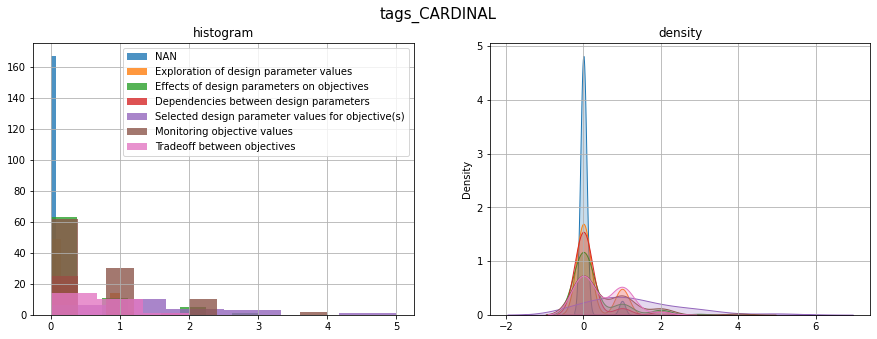

In [36]:
# tags bivariate distribution
for x in dtf.filter(like="tags_", axis=1).columns:
    plot_distributions(dtf, x=x, y="y", bins=None, figsize=(15,5))

In [38]:
# example
i = 0
print("--- original ---")
print(dtf["text"].iloc[i])

print("--- cleaning ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=None, stemm=False, lemm=True))

print("--- tokenization ---")
print(dtf["text"].iloc[i].split())

print("--- remove stopwords ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      stemm=False, lemm=None))

print("--- stemming ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      stemm=True, lemm=False))

print("--- lemmatisation ---")
print(utils_preprocess_text(dtf["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      stemm=False, lemm=True))

--- original ---
Hi piston! My crankshaft depends on your bore diameter. I don't yet know how, but it will probably help that you know.
--- cleaning ---
hi piston my crankshaft depends on your bore diameter i dont yet know how but it will probably help that you know
--- tokenization ---
['Hi', 'piston!', 'My', 'crankshaft', 'depends', 'on', 'your', 'bore', 'diameter.', 'I', "don't", 'yet', 'know', 'how,', 'but', 'it', 'will', 'probably', 'help', 'that', 'you', 'know.']
--- remove stopwords ---
hi piston crankshaft depends bore diameter dont yet know probably help know
--- stemming ---
hi piston crankshaft depend bore diamet dont yet know probabl help know
--- lemmatisation ---
hi piston crankshaft depends bore diameter dont yet know probably help know


In [39]:
# create stopwords
lst_stopwords = create_stopwords(["english"], 
                                 lst_add_words=["dtype","say","new","length","object","u","ha","wa"],
                                 lst_keep_words=["new"])
lst_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'dtype',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'ha',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'length',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'object',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'o

In [41]:
# preprocess text
dtf = add_preprocessed_text(dtf, "text", lst_regex=None, lst_stopwords=lst_stopwords, stemm=False, lemm=True)
dtf.head()

--- found NAs ---
           text text_clean
86       me too           
106          so           
132      not me           
173  i have not           
199        what           


,text,y,text_tagged,tags,tags_ORG,tags_PRODUCT,tags_DATE,tags_PERSON,tags_TIME,tags_QUANTITY,tags_CARDINAL,text_clean
0,Hi piston! My crankshaft depends on your bore ...,NAN,Hi piston! My crankshaft depends on your bore ...,[],0,0,0,0,0,0,0,Hi piston! My crankshaft depends bore diameter...
1,thank you!,NAN,thank you!,[],0,0,0,0,0,0,0,thank you!
2,How low can you go on the piston bore diameter?,Exploration of design parameter values,How low can you go on the piston bore diameter?,[],0,0,0,0,0,0,0,How low go piston bore diameter?
3,"all my fos values are in the hundreds, i suspe...",Effects of design parameters on objectives,"all my fos values are in the hundreds, i suspe...","[{('hundreds', 'CARDINAL'): 1}]",0,0,0,0,0,0,1,"fo value hundreds, suspect depends lot c"
4,Hi flywheel! My crankshaft depends on your fly...,Dependencies between design parameters,Hi flywheel! My crankshaft depends on your fly...,[],0,0,0,0,0,0,0,Hi flywheel! My crankshaft depends flywheel sh...


In [42]:
# check
i = 0
print(dtf["text"].iloc[i], " --> ")
print(dtf["text_clean"].iloc[i])

Hi piston! My crankshaft depends on your bore diameter. I don't yet know how, but it will probably help that you know.  --> 
Hi piston! My crankshaft depends bore diameter. I yet know how, probably help know.


In [43]:
dtf = add_text_length(dtf, "text_clean")
dtf.head()

                     min       mean    max
char_count           1.0  26.599593  137.0
word_count           1.0   6.373984   29.0
sentence_count       1.0   1.136179    3.0
avg_word_length      1.0   4.266769   12.0
avg_sentence_lenght  1.0   5.639566   22.0


,text,y,text_tagged,tags,tags_ORG,tags_PRODUCT,tags_DATE,tags_PERSON,tags_TIME,tags_QUANTITY,tags_CARDINAL,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,Hi piston! My crankshaft depends on your bore ...,NAN,Hi piston! My crankshaft depends on your bore ...,[],0,0,0,0,0,0,0,Hi piston! My crankshaft depends bore diameter...,18,70,3,3.888889,6.0
1,thank you!,NAN,thank you!,[],0,0,0,0,0,0,0,thank you!,3,9,1,3.000000,3.0
2,How low can you go on the piston bore diameter?,Exploration of design parameter values,How low can you go on the piston bore diameter?,[],0,0,0,0,0,0,0,How low go piston bore diameter?,7,27,1,3.857143,7.0
3,"all my fos values are in the hundreds, i suspe...",Effects of design parameters on objectives,"all my fos values are in the hundreds, i suspe...","[{('hundreds', 'CARDINAL'): 1}]",0,0,0,0,0,0,1,"fo value hundreds, suspect depends lot c",8,34,1,4.250000,8.0
4,Hi flywheel! My crankshaft depends on your fly...,Dependencies between design parameters,Hi flywheel! My crankshaft depends on your fly...,[],0,0,0,0,0,0,0,Hi flywheel! My crankshaft depends flywheel sh...,27,108,3,4.000000,9.0


In [44]:
# check
i = 0
print(dtf["text_clean"].iloc[i], " --> ")
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    print(col+":", dtf[col].iloc[i])

Hi piston! My crankshaft depends bore diameter. I yet know how, probably help know.  --> 
word_count: 18
char_count: 70
sentence_count: 3
avg_word_length: 3.888888888888889
avg_sentence_lenght: 6.0


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

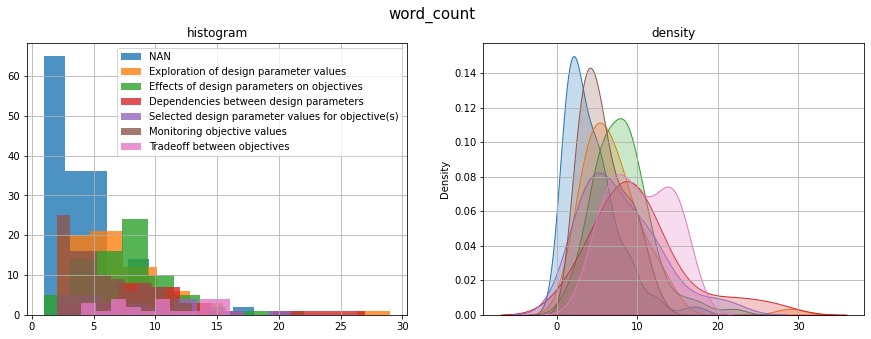

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

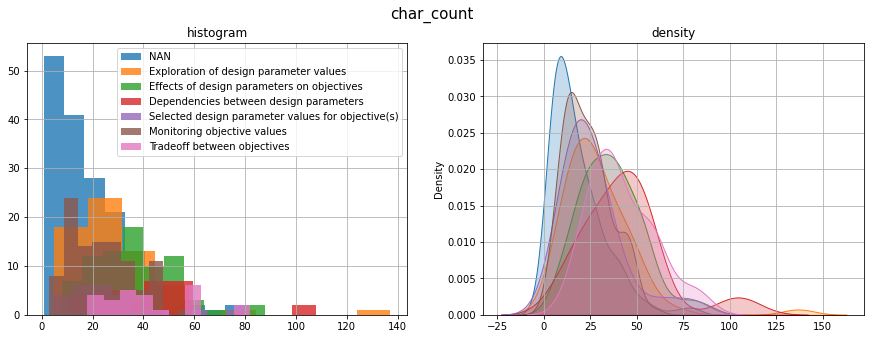

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

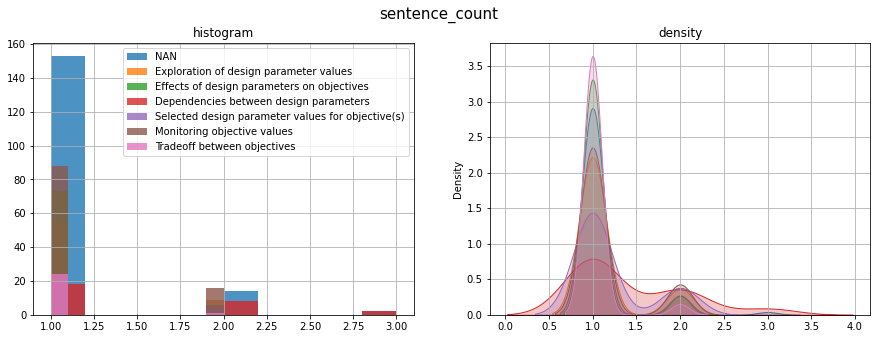

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

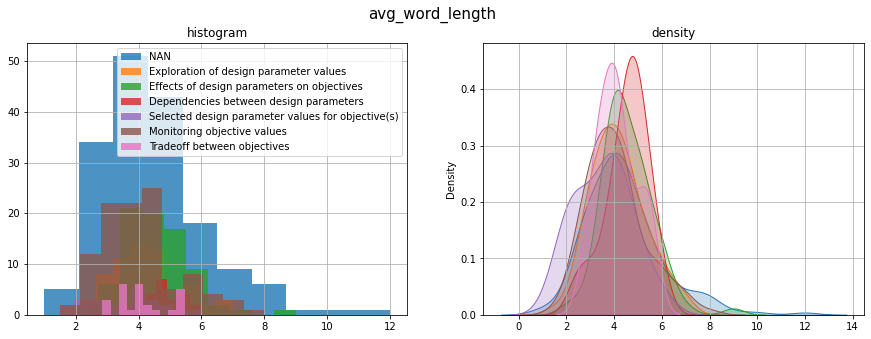

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

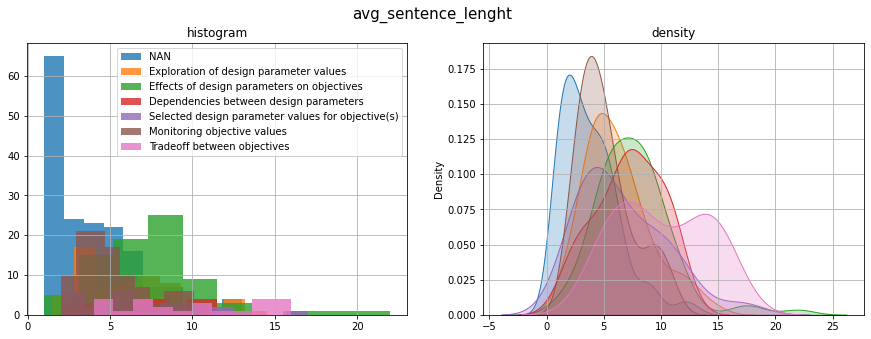

In [45]:
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    plot_distributions(dtf, x=col, y="y", bins=10, figsize=(15,5))

In [46]:
#Sentiment Analysis
dtf = add_sentiment(dtf, "text_clean", algo="textblob", sentiment_range=(-1,1))
dtf.head()

           count      mean       std  min  25%  50%  75%  max
sentiment  492.0  0.155021  0.303742 -0.7  0.0  0.0  0.3  1.0


,text,y,text_tagged,tags,tags_ORG,tags_PRODUCT,tags_DATE,tags_PERSON,tags_TIME,tags_QUANTITY,tags_CARDINAL,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment
0,Hi piston! My crankshaft depends on your bore ...,NAN,Hi piston! My crankshaft depends on your bore ...,[],0,0,0,0,0,0,0,Hi piston! My crankshaft depends bore diameter...,18,70,3,3.888889,6.0,0.0
1,thank you!,NAN,thank you!,[],0,0,0,0,0,0,0,thank you!,3,9,1,3.000000,3.0,0.0
2,How low can you go on the piston bore diameter?,Exploration of design parameter values,How low can you go on the piston bore diameter?,[],0,0,0,0,0,0,0,How low go piston bore diameter?,7,27,1,3.857143,7.0,0.0
3,"all my fos values are in the hundreds, i suspe...",Effects of design parameters on objectives,"all my fos values are in the hundreds, i suspe...","[{('hundreds', 'CARDINAL'): 1}]",0,0,0,0,0,0,1,"fo value hundreds, suspect depends lot c",8,34,1,4.250000,8.0,0.0
4,Hi flywheel! My crankshaft depends on your fly...,Dependencies between design parameters,Hi flywheel! My crankshaft depends on your fly...,[],0,0,0,0,0,0,0,Hi flywheel! My crankshaft depends flywheel sh...,27,108,3,4.000000,9.0,0.0


In [47]:
# check
i = 0
print(dtf["text"].iloc[i], " --> ", dtf["sentiment"].iloc[i])

Hi piston! My crankshaft depends on your bore diameter. I don't yet know how, but it will probably help that you know.  -->  0.0


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a f

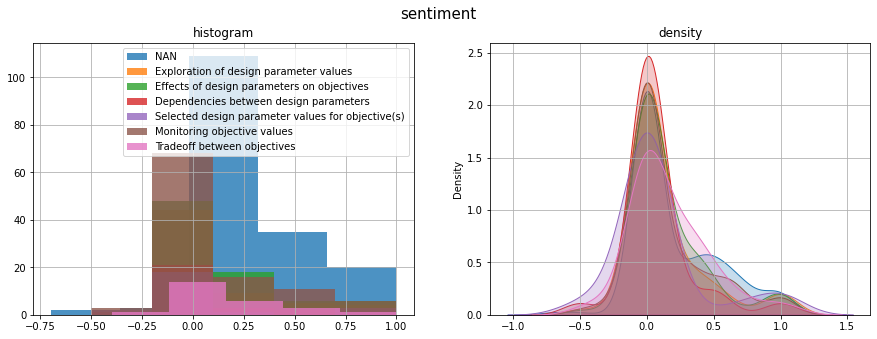

In [48]:
plot_distributions(dtf, x="sentiment", y="y", bins=5, figsize=(15,5))

In [50]:
dtf = add_sentiment(dtf, "text_clean", algo="textblob", sentiment_range=(0,1))

           count      mean       std  min       25%       50%       75%  max
sentiment  492.0  0.502954  0.178672  0.0  0.411765  0.411765  0.588235  1.0


# NAN:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


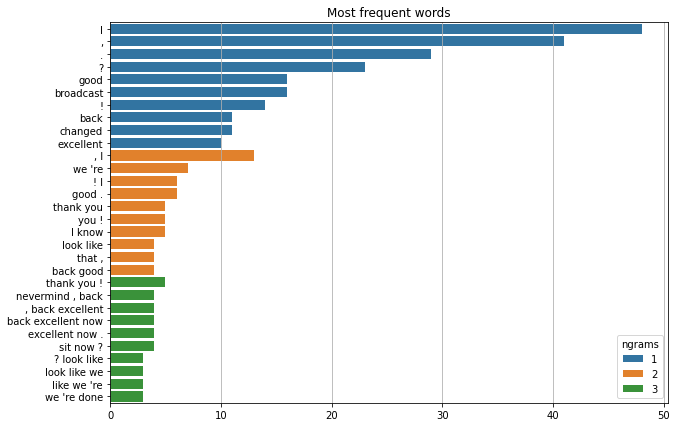

# Exploration of design parameter values:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


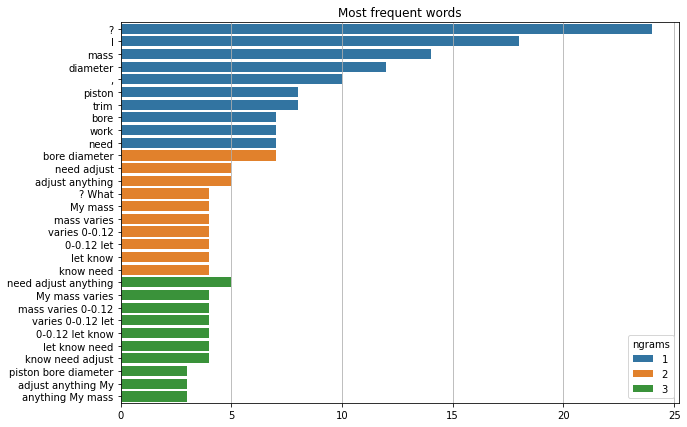

# Effects of design parameters on objectives:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


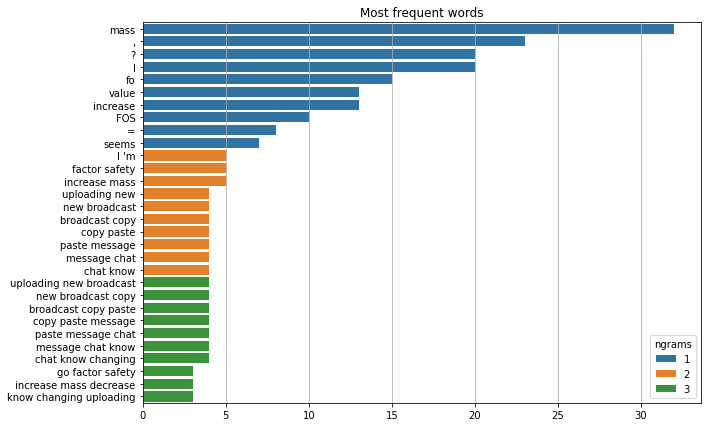

# Dependencies between design parameters:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


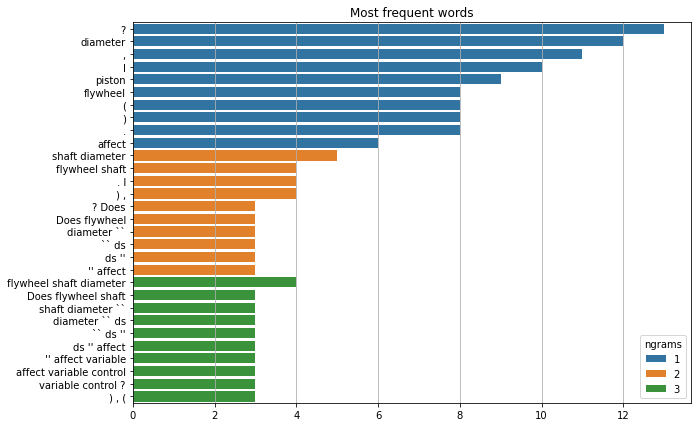

# Selected design parameter values for objective(s):


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


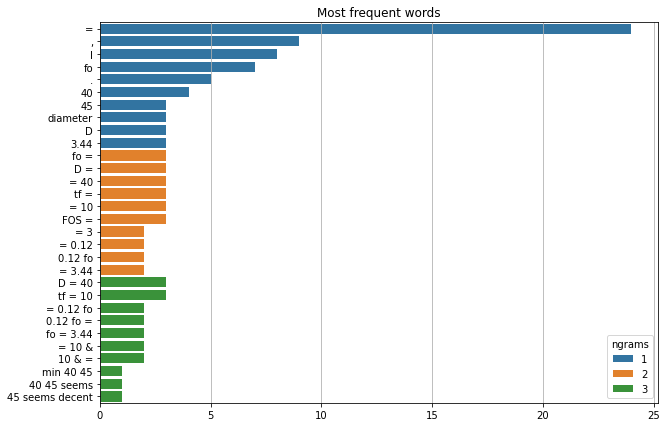

# Monitoring objective values:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


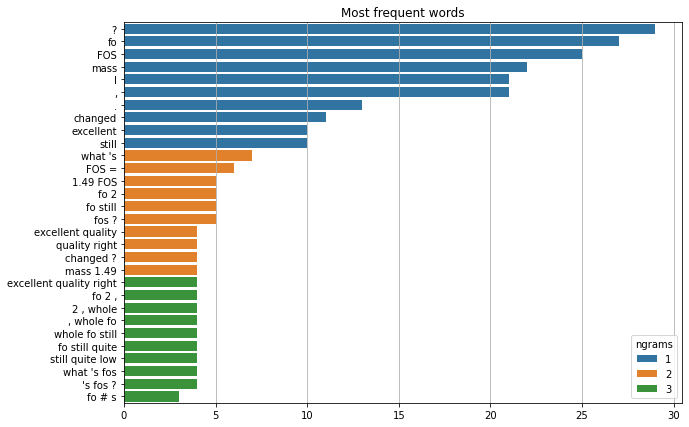

# Tradeoff between objectives:


Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


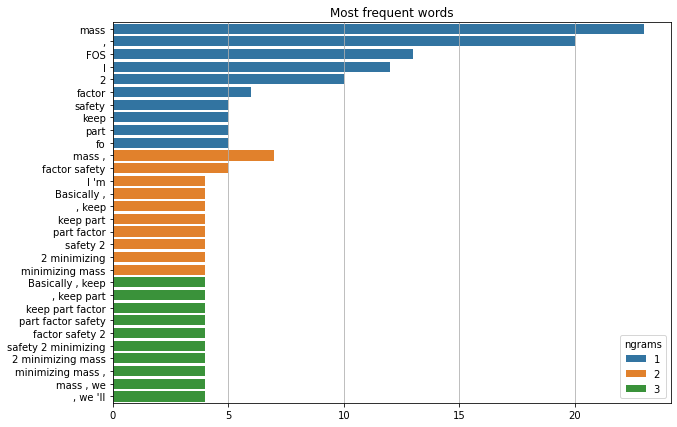

In [51]:
dtf_freq = pd.DataFrame()
for y in dtf["y"].unique():
    print("# {}:".format(y))
    dtf_y = word_freq(corpus=dtf[dtf["y"]==y]["text_clean"], ngrams=[1,2,3], top=10, figsize=(10,7))
    dtf_y["y"] = y
    dtf_freq = dtf_freq.append(dtf_y)

In [52]:
# not necessary
dtf, dic_y_mapping = add_encode_variable(dtf, "y")

print(dic_y_mapping)
dtf[["y","y_id"]].sample(5)

{0: 'Dependencies between design parameters', 1: 'Effects of design parameters on objectives', 2: 'Exploration of design parameter values', 3: 'Monitoring objective values', 4: 'NAN', 5: 'Selected design parameter values for objective(s)', 6: 'Tradeoff between objectives'}


,y,y_id
312,Monitoring objective values,3
356,NAN,4
391,Monitoring objective values,3
189,Dependencies between design parameters,0
314,Dependencies between design parameters,0


In [53]:
dtf_train, dtf_test = dtf_partitioning(dtf, y="y", test_size=0.3, shuffle=False)


X_train shape: (344, 18) | X_test shape: (148, 18)
y:
  NAN  -->  train: 0.35 | test: 0.33
  Monitoring objective values  -->  train: 0.22 | test: 0.19
  Effects of design parameters on objectives  -->  train: 0.16 | test: 0.16
  Exploration of design parameter values  -->  train: 0.14 | test: 0.1
  Dependencies between design parameters  -->  train: 0.06 | test: 0.05
  Selected design parameter values for objective(s)  -->  train: 0.05 | test: 0.05
  Tradeoff between objectives  -->  train: 0.02 | test: 0.12
19 features: ['text', 'text_tagged', 'tags', 'tags_ORG', 'tags_PRODUCT', 'tags_DATE', 'tags_PERSON', 'tags_TIME', 'tags_QUANTITY', 'tags_CARDINAL', 'text_clean', 'word_count', 'char_count', 'sentence_count', 'avg_word_length', 'avg_sentence_lenght', 'sentiment', 'y_id']


In [54]:
y_train = dtf_train["y"].values
y_test = dtf_test["y"].values

# BOW + ML

In [61]:
# Count (classic BoW)
#vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2), lowercase=False)

# Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=100000, ngram_range=(1,6), lowercase=False)

--- creating sparse matrix ---
shape: (344, 3785)
--- creating vocabulary ---
3785 words
--- tokenization ---
344 texts


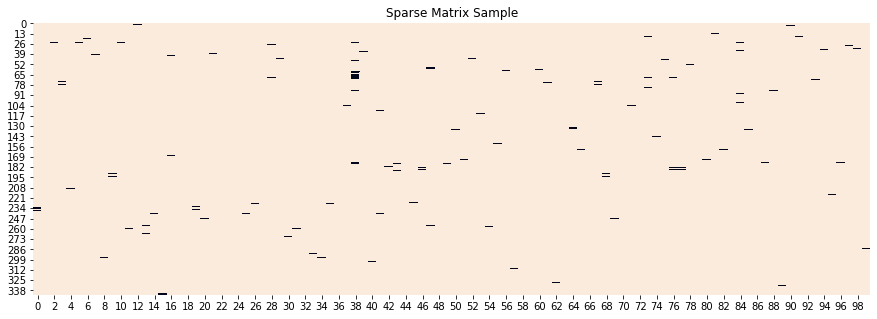

In [63]:

dic_bow = fit_bow(corpus=dtf_train["text_clean"], vectorizer=vectorizer, vocabulary=None)

X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [65]:
# check some features
f_range = (500, 505)

print("fetures name (from dic_vocabulary):")
print({k:v for k,v in sorted(dic_vocabulary.items(), key=lambda item:item[1], reverse=False)
      if v in np.arange(f_range[0], f_range[1]+1, step=1)})

print("")
print("value of these features (in the sparse matrix) for the first text:")
print(vectorizer.get_feature_names()[f_range[0]:f_range[1]])
print(X_train[0, f_range[0]:f_range[1]].todense())

fetures name (from dic_vocabulary):
{'Let know adjust variable better': 500, 'Let know adjust variable better suite': 501, 'Lower': 502, 'Lower lower': 503, 'Lower lower mass': 504, 'Lower lower mass FOS': 505}

value of these features (in the sparse matrix) for the first text:
['Let know adjust variable better', 'Let know adjust variable better suite', 'Lower', 'Lower lower', 'Lower lower mass']
[[0. 0. 0. 0. 0.]]


In [66]:
# check text conversion
i = 0

## list of text: ["I like this", ...]
len_txt = len(dtf_train["text_clean"].iloc[i].split())
print("from: ", dtf_train["text_clean"].iloc[i], "| len:", len_txt)

## list of token ids: [[1, 2, 3], ...]
len_tokens = len(lst_text2tokens[i])
print("to: ", lst_text2tokens[i], "| len:", len(lst_text2tokens[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf_train["text_clean"].iloc[i].split()[0], " -- idx in vocabulary -->", 
      dic_vocabulary[dtf_train["text_clean"].iloc[i].split()[0]])

## words not in vocabulary?
if len_txt-len_tokens != 0:
    missing_words = [word for word in dtf_train["text_clean"].iloc[i].split() if word not in dic_vocabulary.keys()]
    print("!!!", len_txt-len_tokens, "words not in vocabulary:", missing_words)

from:  Hi piston! My crankshaft depends bore diameter. I yet know how, probably help know. | len: 14
to:  [357, 2705, 519, 1235, 1363, 996, 1448, 3771, 2142, 1982, 2807, 1959, 2142] | len: 13
check:  Hi  -- idx in vocabulary --> 357
!!! 1 words not in vocabulary: ['piston!', 'diameter.', 'I', 'how,', 'know.']


In [67]:
X_names, dtf_selection = features_selection(X_train, dtf_train["y"], X_names, top=None, print_top=10)


features selection: from 3,785 to 404
 
# Dependencies between design parameters:
  . selected features: 81
  . top features: ds, shaft, shaft diameter, might, might piston, Does, Does flywheel, Does flywheel shaft, Does flywheel shaft diameter, Does flywheel shaft diameter ds
 
# Effects of design parameters on objectives:
  . selected features: 8
  . top features: increase mass, increase, max, effect, If, Increasing, 60, all
 
# Exploration of design parameter values:
  . selected features: 40
  . top features: trim, 40 work, try, adjust anything, need adjust, need adjust anything, work, work best, mm, 10
 
# Monitoring objective values:
  . selected features: 10
  . top features: fos, what, what fos, fo, right, FOS, excellent quality right, quality right, excellent quality, fo getting
 
# NAN:
  . selected features: 6
  . top features: broadcast, thank, sit, sit now, now, thank you
 
# Selected design parameter values for objective(s):
  . selected features: 94
  . top features: dia

In [68]:
dtf_selection.sample(5)


,feature,score,y
3549,variable control,0.996267,Dependencies between design parameters
2609,now piston biggest,0.963309,Dependencies between design parameters
2181,leave now piston,0.963309,Dependencies between design parameters
2353,mass chamce bring,0.996882,Tradeoff between objectives
1757,fo 44 40,0.992689,Selected design parameter values for objective(s)


--- creating sparse matrix ---
shape: (344, 404)
--- used vocabulary ---
404 words
--- tokenization ---
344 texts


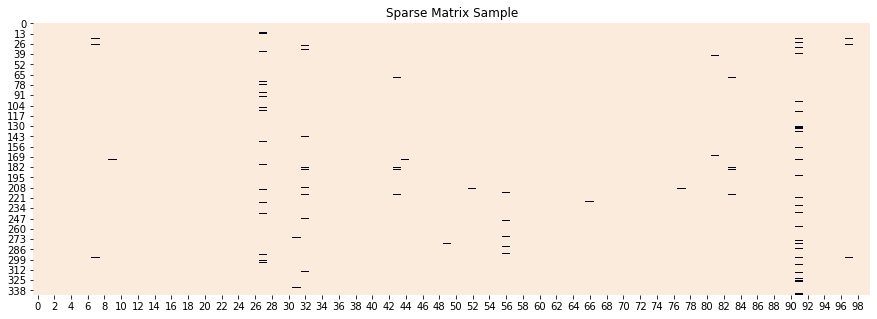

In [69]:
# Recreate Vectorizer with the selected vocabulary
dic_bow = fit_bow(corpus=dtf_train["text_clean"], vocabulary=X_names)

X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [70]:
# Explore the sparse matrix as dtf
dtf_X_train = sparse2dtf(X_train, dic_vocabulary, X_names, prefix="")

In [71]:
dtf_X_train = pd.concat([dtf_train[["text","y"]], dtf_X_train.set_index(dtf_train.index)], axis=1)
dtf_X_train.head()

,text,y,ds,shaft,shaft diameter,might,might piston,Does,Does flywheel,Does flywheel shaft,...,trying get lowest mass,trying get lowest mass factor,trying get lowest mass factor safety,weight range,weight range excellent,weight range excellent trying,weight range excellent trying get,weight range excellent trying get lowest,Ok,unless
0,Hi piston! My crankshaft depends on your bore ...,NAN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,thank you!,NAN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,How low can you go on the piston bore diameter?,Exploration of design parameter values,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"all my fos values are in the hundreds, i suspe...",Effects of design parameters on objectives,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Hi flywheel! My crankshaft depends on your fly...,Dependencies between design parameters,0.0,0.335022,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
#Model Design
classifier = naive_bayes.MultinomialNB()

In [73]:
# Train/Test

# Take the raw text for X_test and will be transformed/predicted by the pipeline
X_test = dtf_test["text_clean"].values

In [74]:
model, predicted_prob, predicted = fit_ml_classif(X_train, y_train, X_test, vectorizer, classifier)


Accuracy: 0.39
Auc: 0.57
Detail:
                                                   precision    recall  f1-score   support

           Dependencies between design parameters       0.00      0.00      0.00         7
       Effects of design parameters on objectives       0.20      0.04      0.07        23
           Exploration of design parameter values       0.33      0.07      0.11        15
                      Monitoring objective values       0.28      0.43      0.34        28
                                              NAN       0.44      0.88      0.59        49
Selected design parameter values for objective(s)       0.00      0.00      0.00         8
                      Tradeoff between objectives       0.00      0.00      0.00        18

                                         accuracy                           0.39       148
                                        macro avg       0.18      0.20      0.16       148
                                     weighted avg      

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


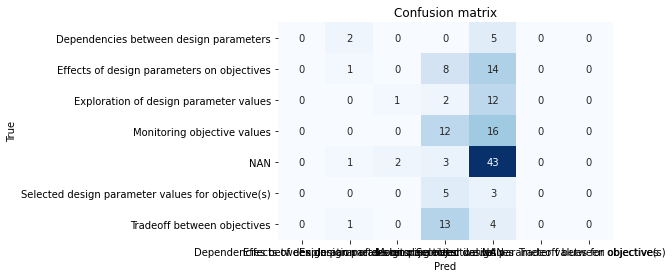

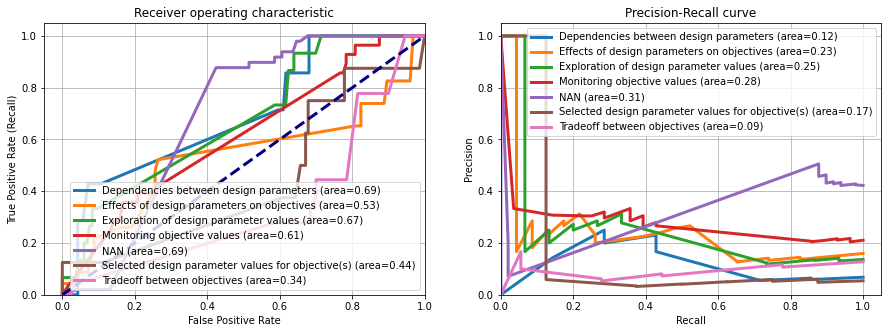

In [75]:
#Evaluate
evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))


In [91]:
#Explain
i = 17
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),5))
print(" ")
exp = explainer_lime(model, y_train, txt_instance=dtf_test["text"].iloc[i], top=10)
print(dtf_test["text"].iloc[i])

True: Selected design parameter values for objective(s) --> Pred: Monitoring objective values | Prob: 0.34982
 


for tf = 10 & ds = 15; m = 0.52 and FOS = 1215.12


In [ ]:
https://github.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/blob/master/natural_language_processing/example_text_classification.ipynb
    https://towardsdatascience.com/text-analysis-feature-engineering-with-nlp-502d6ea9225d
        https://towardsdatascience.com/text-classification-with-no-model-training-935fe0e42180
            https://event.asme.org/IDETC-CIE/Program/Student-Hackathon
                https://event.asme.org/Events/media/library/resources/idetc-cie/IDETC-2021-Student-Design-Essay-Competition.pdf
                    https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28